# Import Required Packages & Modules

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import SCORERS, make_scorer
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier 

# Loading the Dataset

In [2]:
# Load dataset
pd.set_option('max_column',50)
df_bank = pd.read_csv("bank-additional-full.csv", delimiter=';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Preprocessing

### Converting the label into zero & one values

In [3]:
le = LabelEncoder()
df_bank['y']=le.fit_transform(df_bank['y'])
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### One-hot encoding on the categorical features

In [4]:
# Finding the cat features 
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Creating a Class to generate dummy variables from cat features 
class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features)

In [6]:
# Using the Class to generate dummy variables
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

encoder = OneHotEncoderCategoricalFeatures(cat_features)
df = encoder.transform(df_bank)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


### Droping the feature "duration"

In [7]:
df.drop('duration', 1,inplace=True)

### Checking for missing values

In [8]:
np.sum(df.isnull().sum())

0

In [9]:
# Based on the aboved result, we don't have any missing values.
# However, let's see what happend if we try to drop NaN values.
print("Number of rows before dropping NaNs: %d" % len(df))
df.dropna(inplace=True)
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


### Plotting a histogram of the label variable

<AxesSubplot:>

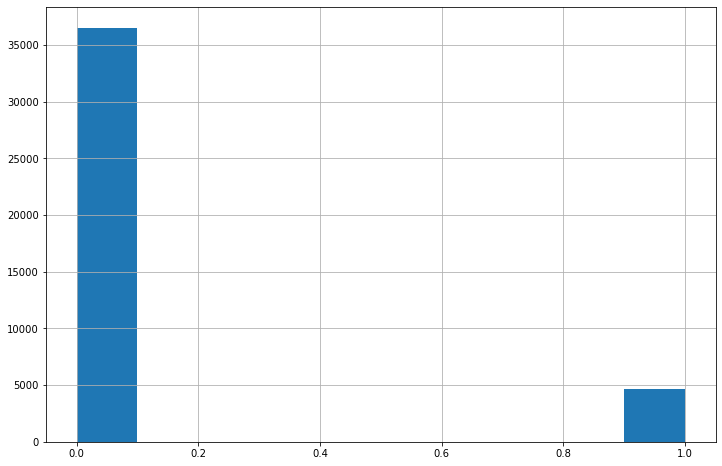

In [10]:
# Histogram
df['y'].hist(figsize=(12,8))

### Calculating the imbalance in the dataset

In [11]:
# Finding the minority group
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [12]:
# Calculating the Imbalance in the Dataset
imb = len(df[df.y==1])/len(df['y'])
imb

0.11265417111780131

# Model

### Splitting data into train and test sets

In [13]:
# Split the dataset into train and test sets
df_tr, df_ts = train_test_split(df, test_size=0.2, random_state=50, stratify=df['y'])

In [14]:
# Creating different dataset for the label and features
y_tr, y_ts = df_tr['y'], df_ts['y']
X_tr, X_ts = df_tr.drop('y',1), df_ts.drop('y',1)

### 10-fold cross validation score

In [15]:
print(sorted(SCORERS.keys()))

# Accuracy is the best metric in this projec, however, we can use precision and recall as well.

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


In [16]:
# Algorithm
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
# 10-fold cv score
cvs_def = cross_val_score(rfc, X_tr,y_tr,cv=10, scoring=make_scorer(accuracy_score))

In [17]:
cvs_def.mean()

0.8985432473444614

### Comparing with a dummy classifier

In [18]:
X = df.drop('y',1)
y = df['y']
dummy_clf = DummyClassifier(strategy='stratified', random_state=50)
cvs_dum = cross_val_score(dummy_clf, X_tr,y_tr,cv=10, scoring=make_scorer(accuracy_score))
# mdl_dum = dummy_clf.fit(X, y)

In [19]:
acc = cvs_dum.mean()
acc

0.791927162367223

In [20]:
def accuracy(base_mdl,dum_mdl):
    acc_def = round(round(base_mdl.mean(),6)*100,6)
    
    acc_dum = round(round(dum_mdl.mean(),6)*100,6)
    
    print(' ')
    print('======== The Base Model ========')
    print(' ')
    print('Accuracy = {}%'.format(acc_def))
    print(' ')
    print(' ')
    print('======== The Model with Dummy Classifier ========')
    print(' ')
    print('Accuracy = {}%'.format(acc_dum))
    

In [21]:
accuracy(cvs_def,cvs_dum)

 
======== The Base Model ========
 
Accuracy = 89.8543%
 
 
======== The Model with Dummy Classifier ========
 
Accuracy = 79.1927%


### Hyperparameter Tunning with Grid Search

In [22]:
params = {
    'n_estimators' : [10, 100, 500, 1000],
    'max_depth' : [1,3,10,20,50]
}

In [23]:
rf = RandomForestClassifier(random_state=50)
rf_gs = GridSearchCV(rf,params,n_jobs=-1,cv=10,scoring=make_scorer(accuracy_score))

In [24]:
mdl_rf_gs = rf_gs.fit(X_tr,y_tr)

In [25]:
rf_gs_res = pd.DataFrame(rf_gs.cv_results_).sort_values('mean_test_score',ascending=False)
rf_gs_res.reset_index(drop=True,inplace=True)

In [26]:
rf_gs_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,16.743375,0.222412,0.310904,0.017745,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.901366,0.903187,0.896206,0.901669,0.892868,0.903187,0.913202,0.898027,0.901062,0.898027,0.900880,0.005154,1
1,36.266915,0.998391,0.694563,0.017881,10,1000,"{'max_depth': 10, 'n_estimators': 1000}",0.901669,0.902883,0.895599,0.900759,0.893171,0.903490,0.911684,0.898027,0.902276,0.898634,0.900819,0.004802,2
2,3.127280,0.066790,0.071516,0.008105,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.900455,0.901366,0.894992,0.899545,0.892868,0.904097,0.910470,0.898634,0.899848,0.898027,0.900030,0.004587,3
3,0.365586,0.007654,0.012499,0.006249,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.899241,0.901973,0.894385,0.898331,0.894385,0.903187,0.908953,0.899848,0.900455,0.898027,0.899879,0.004057,4
4,1.354542,0.045308,0.043745,0.006250,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.894385,0.900455,0.894992,0.899545,0.894385,0.901669,0.907739,0.897724,0.898634,0.895903,0.898543,0.003922,5
5,7.189850,0.330521,0.218726,0.015623,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.894385,0.900455,0.894992,0.899241,0.894385,0.901973,0.907436,0.897420,0.898634,0.895903,0.898483,0.003878,6
6,75.041359,5.112271,1.545627,0.100109,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",0.897724,0.905615,0.896510,0.898938,0.889226,0.901669,0.905615,0.893171,0.899848,0.894385,0.898270,0.004986,7
7,13.153407,0.217517,0.422396,0.040558,3,1000,"{'max_depth': 3, 'n_estimators': 1000}",0.894082,0.900152,0.894689,0.899241,0.894082,0.901669,0.905918,0.897420,0.898938,0.895903,0.898209,0.003594,8
8,32.505735,0.458536,0.617342,0.031275,20,500,"{'max_depth': 20, 'n_estimators': 500}",0.897420,0.905311,0.896206,0.897420,0.888012,0.901366,0.907436,0.893778,0.899241,0.894689,0.898088,0.005364,9
9,6.319631,0.058977,0.118737,0.007654,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.897724,0.904401,0.897420,0.895599,0.888316,0.901062,0.906525,0.894689,0.899241,0.892868,0.897785,0.005112,10


### Comparing the base model and the model with the best params

In [27]:
rfc_def = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)
rfc_best = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=50)

In [28]:
cvs_d = cross_val_score(rfc_def, X_tr,y_tr,cv=10, scoring=make_scorer(accuracy_score))
cvs_b = cross_val_score(rfc_best, X_tr,y_tr,cv=10, scoring=make_scorer(accuracy_score))

In [29]:
def acc(base_mdl,best_mdl):
    acc_def = round(round(cvs_d.mean(),6)*100,6)
    
    acc_best = round(round(cvs_b.mean(),6)*100,6)
    
    print(' ')
    print('======== The Base Model ========')
    print('The Model with N Estimators: {} and Max Depth: {}'.format(100,3))
    print(' ')
    print('Accuracy = {}%'.format(acc_def))
    print(' ')
    print(' ')
    print('======== The Model with the Best Params ========')
    print(' ')
    print('The Model with N Estimators: {} and Max Depth: {}'.format(500,10))
    print(' ')
    print('Accuracy = {}%'.format(acc_best))
    

In [30]:
acc(cvs_d,cvs_b)

 
======== The Base Model ========
The Model with N Estimators: 100 and Max Depth: 3
 
Accuracy = 89.8543%
 
 
======== The Model with the Best Params ========
 
The Model with N Estimators: 500 and Max Depth: 10
 
Accuracy = 90.088%


### Feature Importances (top 3)

In [31]:
# Fitting the models with the default and best params
mdl_d = rfc_def.fit(X_tr,y_tr)
mdl_b = rfc_best.fit(X_tr,y_tr)

In [32]:
# Feature Importances wit the best hyperparameters
y_b, X_b = zip(*sorted(zip(mdl_b.feature_importances_,X_tr.columns),reverse=False))

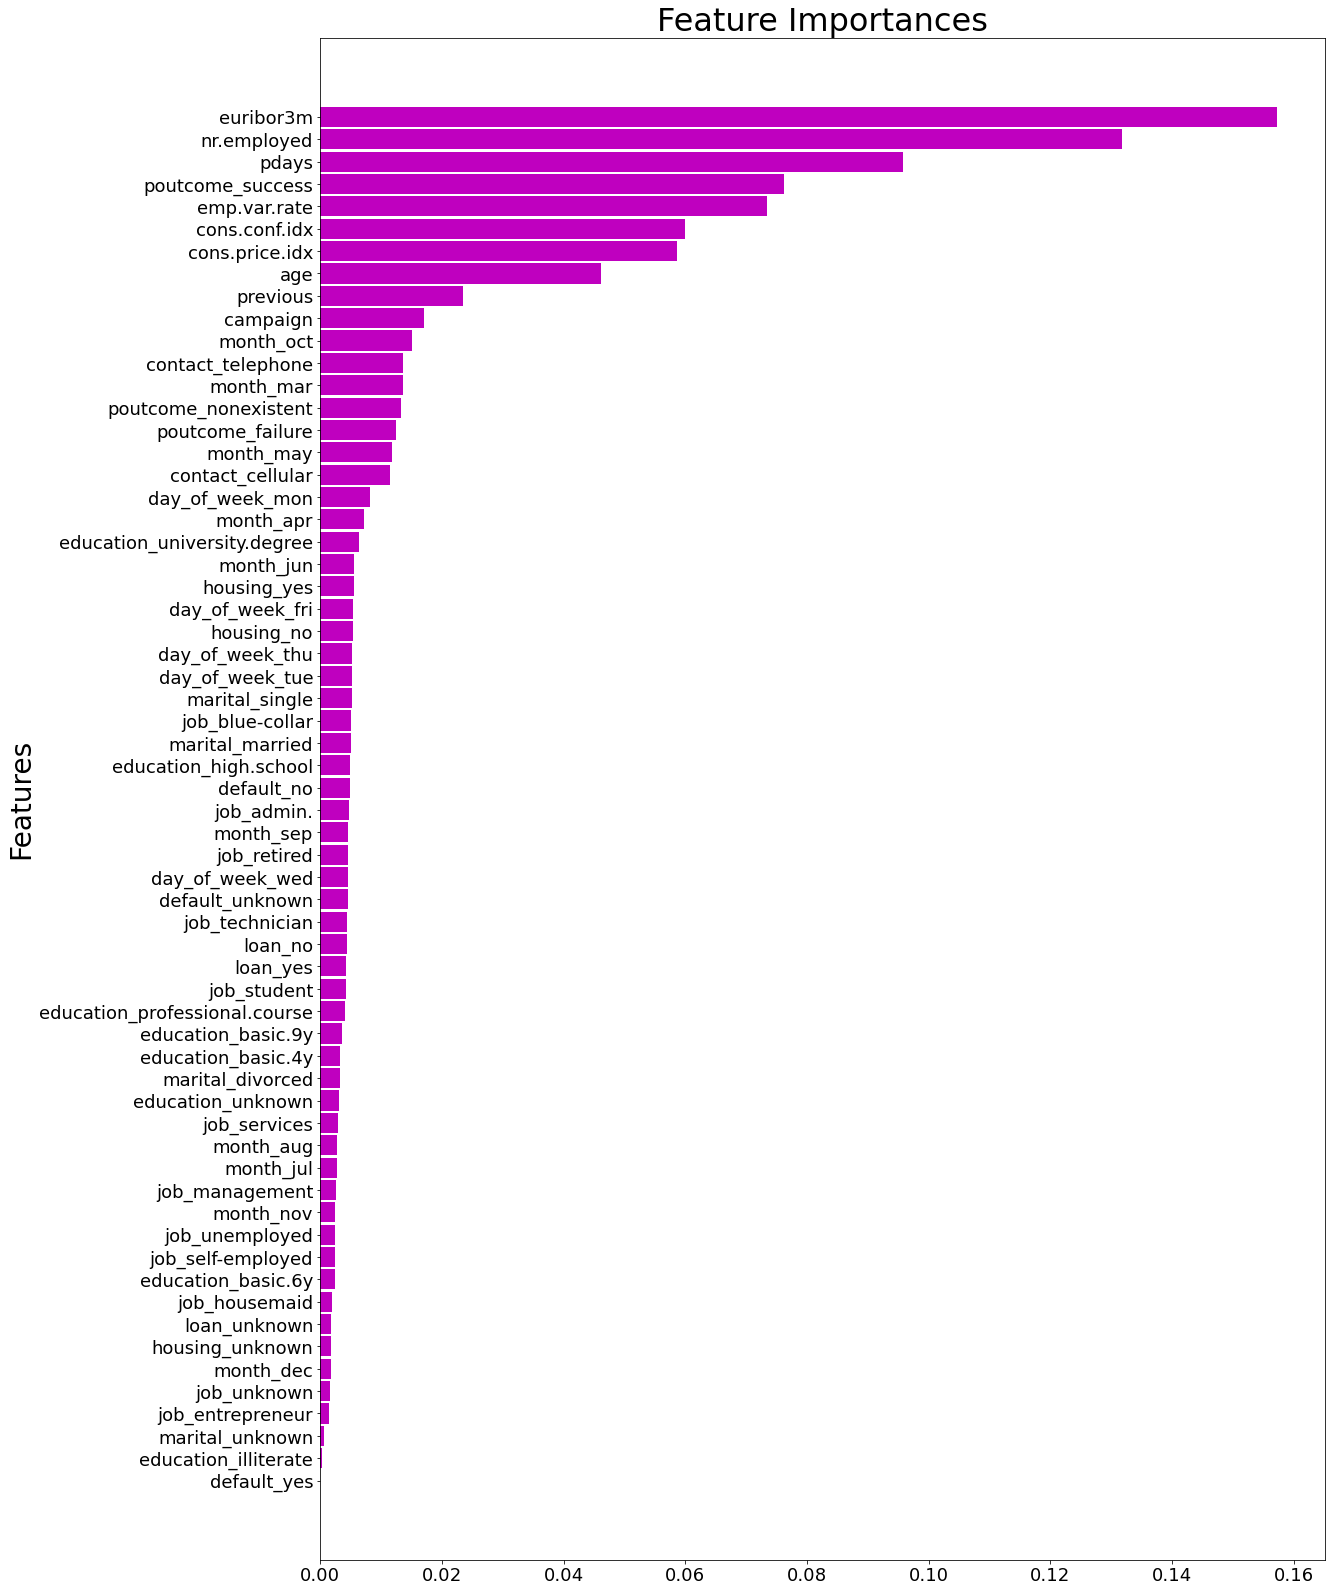

In [34]:
plt.barh(X_b,y_b,color='m',height=0.9)
plt.title('Feature Importances',fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Features',fontsize=28)
fig=plt.gcf()
fig.set_size_inches(18,28)


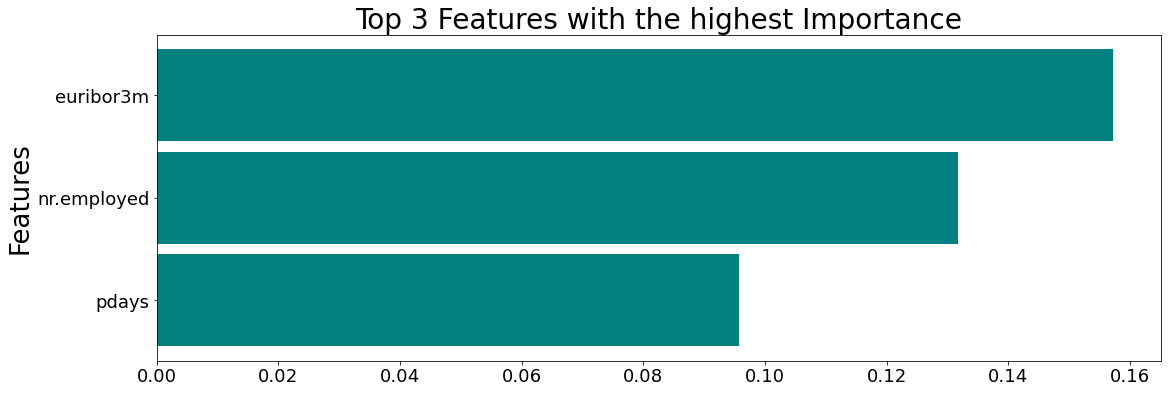

In [35]:
plt.barh(X_b[59:],y_b[59:],color='teal',height=0.9)
plt.title('Top 3 Features with the highest Importance',fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Features',fontsize=26)
fig=plt.gcf()
fig.set_size_inches(18,6)

### Generalisation error using the test set

In [36]:
def acc_gen(model_default,model_best,features,label):
    y_pred_default = model_default.predict(features)
    acc_default = round(accuracy_score(label,y_pred_default),6)
    
    y_pred_best = model_best.predict(features)
    acc_best = round(accuracy_score(label,y_pred_best),6)
    
    print(' ')
    print('======== The Base Model ========')
    print('The Model with N Estimators: {} and Max Depth: {}'.format(model_default.n_estimators,
                                                                                           model_default.max_depth))
    print(' ')
    print('Accuracy = {}%'.format(round(acc_default*100,6)))
    print(' ')
    print(' ')
    print('======== The Model with the Best Params ========')
    print(' ')
    print('The Model with N Estimators: {} and Max Depth: {}'.format(model_best.n_estimators,
                                                                                           model_best.max_depth))
    print(' ')
    print('Accuracy = {}%'.format(round(acc_best*100,6)))
    

In [37]:
acc_gen(mdl_d,mdl_b,X_ts,y_ts)

 
======== The Base Model ========
The Model with N Estimators: 100 and Max Depth: 3
 
Accuracy = 89.9854%
 
 
======== The Model with the Best Params ========
 
The Model with N Estimators: 500 and Max Depth: 10
 
Accuracy = 90.1432%
